<a href="https://colab.research.google.com/github/dimages/Prediabetes-prognosis/blob/main/Diabetes_Prediction_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
import plotly.express as px
from joblib import dump
from sklearn.model_selection import train_test_split, cross_val_predict
from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import imblearn
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTENC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import joblib

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 93.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/diabetes_dataset__2019.csv')

data.head(10)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
5,40-49,Male,no,yes,none,21.0,no,yes,10,10,no,occasionally,sometimes,high,0.0,0,not much,yes
6,less than 40,Male,no,no,one hr or more,24.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
7,less than 40,Male,no,no,less than half an hr,20.0,no,no,7,7,yes,occasionally,sometimes,low,0.0,0,not much,no
8,40-49,Male,yes,no,one hr or more,23.0,no,no,7,7,no,occasionally,sometimes,normal,0.0,0,not much,no
9,less than 40,Male,no,no,more than half an hr,20.0,no,no,8,8,o,occasionally,sometimes,normal,0.0,0,not much,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

Этот набор данных включает 17 атрибутов и объект прогнозирования: диабетик. Среди всех 17 предикторов четыре являются количественными: ИМТ, сон, здоровый сон и беременность. Остальные 13 являются качественными, более подробный обзор данных о потенциальных проблемах представлен ниже.

Подробное описание каждого предиктора приведено ниже:

Возраст: числовой, возраст пациента

Пол: категориальный, два уровня, пол пациента

Family_Diabetes: категориальный, два уровня, есть ли в семье пациента случаи заболевания диабетом.

HighBP: категориальный, два уровня, есть ли у пациента высокое кровяное давление

Физически активный: категориальный, четыре уровня, количество времени, которое пациент ежедневно уделяет физическим упражнениям.

ИМТ: числовой, индекс ИМТ тела пациента

Курение: категорическое, двухуровневое, независимо от того, курит пациент или нет

Алкоголь: категорический, двухуровневый, независимо от того, употребляет пациент алкоголь или нет.

Сон: числовое значение, среднее количество времени, которое пациент спит каждый день (в часах).

SoundSleep: числовое значение, количество времени, в течение которого пациент находится в режиме SoundSleep каждый день в среднем (в часах).

RegularMedicine: категориальный, два уровня, регулярно ли пациент использует лекарства в повседневной жизни.

Нездоровая пища: категориально, четыре уровня, как часто пациент ест нездоровую пищу

Стресс: категориальный, четыре уровня, как часто пациент испытывает стресс

Уровень АД: категориальный, три уровня, низкий, нормальный или высокий

Беременности: численно, количество беременностей у пациентки

Сахарный диабет: категориальный, двухуровневый, был ли у пациентки гестационный диабет во время беременности

UriationFreq: категориальный, два уровня, высокая частота мочеиспускания у пациента.

Диабетический: категорический, двухуровневый, заразился ли пациент диабетом

In [7]:
for col in data.columns:
    print(col)
    print(data[col].value_counts())
    print(f'-'*20)

Age
less than 40    488
40-49           164
50-59           156
60 or older     144
Name: Age, dtype: int64
--------------------
Gender
Male      580
Female    372
Name: Gender, dtype: int64
--------------------
Family_Diabetes
no     498
yes    454
Name: Family_Diabetes, dtype: int64
--------------------
highBP
no     724
yes    228
Name: highBP, dtype: int64
--------------------
PhysicallyActive
less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64
--------------------
BMI
24.0    111
21.0     88
23.0     76
28.0     71
26.0     66
33.0     64
27.0     63
22.0     58
20.0     48
19.0     36
25.0     34
30.0     33
18.0     32
29.0     28
38.0     28
36.0     20
17.0     16
32.0     16
31.0     16
34.0     12
35.0     12
15.0      8
39.0      4
40.0      4
42.0      3
45.0      1
Name: BMI, dtype: int64
--------------------
Smoking
no     844
yes    108
Name: Smoking, dtype: int64
----------

In [8]:
# Создание датафрейма из словаря
df = pd.DataFrame.from_dict(data)

# Перебор столбцов и вывод уникальных значений
for column in df.columns:
    unique_values = df[column].unique()
    count = len(unique_values)

    print(f"Количество уникальных значений в столбце '{column}': {count}")
    print(f"Уникальные значения в столбце '{column}':")
    print(unique_values)
    print()

Количество уникальных значений в столбце 'Age': 4
Уникальные значения в столбце 'Age':
['50-59' '40-49' 'less than 40' '60 or older']

Количество уникальных значений в столбце 'Gender': 2
Уникальные значения в столбце 'Gender':
['Male' 'Female']

Количество уникальных значений в столбце 'Family_Diabetes': 2
Уникальные значения в столбце 'Family_Diabetes':
['no' 'yes']

Количество уникальных значений в столбце 'highBP': 2
Уникальные значения в столбце 'highBP':
['yes' 'no']

Количество уникальных значений в столбце 'PhysicallyActive': 4
Уникальные значения в столбце 'PhysicallyActive':
['one hr or more' 'less than half an hr' 'none' 'more than half an hr']

Количество уникальных значений в столбце 'BMI': 27
Уникальные значения в столбце 'BMI':
[39. 28. 24. 23. 27. 21. 20. 26. 22. 15. 34. 30. 29. 18. 32. 31. 36. 38.
 40. 35. 19. 33. 17. 25. nan 42. 45.]

Количество уникальных значений в столбце 'Smoking': 2
Уникальные значения в столбце 'Smoking':
['no' 'yes']

Количество уникальных знач

In [9]:
unique_values = data['Pdiabetes'].unique()
print(unique_values)

['0' 'yes' nan 'no']


Подчистим значения признаков.

In [10]:
data['RegularMedicine'].replace('o','no', inplace=True)
data['BPLevel'] = data['BPLevel'].str.lower().str.strip()
data['Pdiabetes'].replace('0', 'no', inplace=True)
data['Diabetic'] = data['Diabetic'].str.strip()

Посмотрим на количество пропущенных значений.

<Axes: >

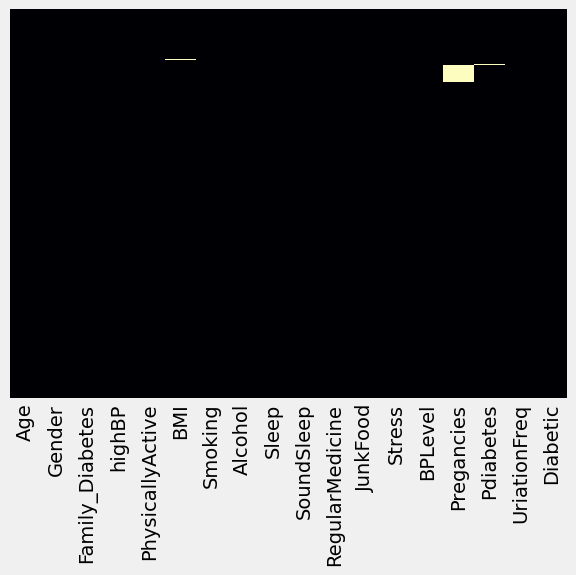

In [11]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')

In [12]:
data.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

Видим, что в признаке Pregnancies 42 пропущенных значения.

Удалим 1 строку с пропущенным значением Pdiabetes.

In [13]:
data.dropna(subset=['Pdiabetes'], inplace=True)

Удалим строку, содержащую пропуск в признаке Diabetic.

In [14]:
data.dropna(subset=['Diabetic'], inplace=True)

Проверим, есть ли пропущенные значения у мужчин.

In [15]:
data[data['Gender']=='Male']['Pregancies'].isna().sum()

16

Удалим пропущенные значения для мужчин.

In [16]:
data.loc[data['Gender'] == 'Male', 'Pregancies'] = data.loc[data['Gender'] == 'Male', 'Pregancies'].fillna(0)

<Axes: xlabel='Age', ylabel='Pregancies'>

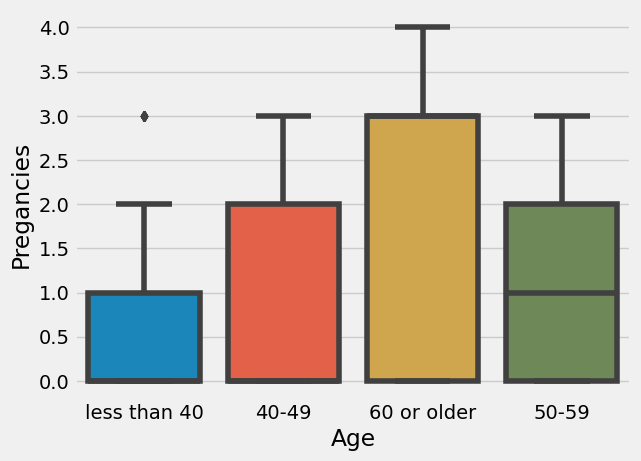

In [17]:
sns.boxplot(data = data[data['Gender'] == 'Female'], x='Age', y='Pregancies')

Смотрим, в каких строках в зависимости от возраста пропущены значения признака беременности.

In [18]:
missing_values = data.groupby('Age')['Pregancies'].apply(lambda x: x.isnull().sum())
print(missing_values)

Age
40-49            8
50-59            4
60 or older      1
less than 40    13
Name: Pregancies, dtype: int64


In [19]:
diabetes_fm = data.query("Gender == 'Female'")
diabetes_fm_40 = diabetes_fm.query("Age == 'less than 40'")
diabetes_fm_50 = diabetes_fm.query("Age == '40-49'")
diabetes_fm_60 = diabetes_fm.query("Age == '50-59'")
diabetes_fm_over60 = diabetes_fm.query("Age == '60 or older'")

In [20]:
preg_40 = round(np.mean(diabetes_fm_40['Pregancies']))
preg_50 = round(np.mean(diabetes_fm_50['Pregancies']))
preg_60 = round(np.mean(diabetes_fm_60['Pregancies']))
preg_over60 = round(np.mean(diabetes_fm_over60['Pregancies']))

In [21]:
data['Pregancies'] = data['Pregancies'].fillna(
    data['Age'].map({
        'less than 40': preg_40,
        '40-49': preg_50,
        '50-59': preg_60,
        '60 or older': preg_over60
    })
)

Так как беременность нельзя заменить средним значением, т.к. роды были либо 0 раз, либо 1,2,3 и т.д.

In [22]:
mean_value = round(data['BMI'].mean())
data['BMI'] = data['BMI'].fillna(mean_value)

In [23]:
data.head(10)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,no,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,no,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,no,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,no,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,no,not much,no
5,40-49,Male,no,yes,none,21.0,no,yes,10,10,no,occasionally,sometimes,high,0.0,no,not much,yes
6,less than 40,Male,no,no,one hr or more,24.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,no,not much,no
7,less than 40,Male,no,no,less than half an hr,20.0,no,no,7,7,yes,occasionally,sometimes,low,0.0,no,not much,no
8,40-49,Male,yes,no,one hr or more,23.0,no,no,7,7,no,occasionally,sometimes,normal,0.0,no,not much,no
9,less than 40,Male,no,no,more than half an hr,20.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,no,not much,no


поехали заменять категор признаки...

In [24]:
num_cols = ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']
category_cols = list(set(data.columns).difference(set(num_cols)))

data_clean = pd.DataFrame()
for col in num_cols:
    data_clean[col] = data[col].astype('int')

for col in category_cols:
    data_clean[col] = data[col].astype('category')

In [25]:
category_mapping = {
    'Age':{'less than 40':0, '40-49':1, '50-59':2, '60 or older':3},
    'Family_Diabetes':{'no':0, 'yes':1},
    'Gender':{'Female':0, 'Male':1},
    'Smoking':{'no':0, 'yes':1},
    'Pdiabetes':{'no':0, 'yes':1},
    'RegularMedicine':{'no':0, 'yes':1},
    'PhysicallyActive':{'one hr or more':0, 'more than half an hr':1, 'less than half an hr':2, 'none':3},
    'JunkFood':{'occasionally':0, 'often':1, 'very often':2, 'always':3},
    'BPLevel':{'low':0, 'normal':1, 'high':2},
    'highBP':{'no':0, 'yes':1},
    'Alcohol':{'no':0, 'yes':1},
    'UriationFreq':{'not much':0, 'quite often':1},
    'Stress':{'not at all':0, 'sometimes':1, 'very often':2, 'always':3},
    'Diabetic':{'no':0, 'yes':1},
}

for col in category_cols:
    data_clean[col] = data_clean[col].map(category_mapping[col])

In [26]:
data_clean.head()

,BMI,Sleep,SoundSleep,Pregancies,highBP,Gender,RegularMedicine,JunkFood,Stress,Smoking,PhysicallyActive,Age,BPLevel,Family_Diabetes,Alcohol,Pdiabetes,UriationFreq,Diabetic
0,39,8,6,0,1,1,0,0,1,0,0,2,2,0,0,0,0,0
1,28,8,6,0,1,1,1,2,1,0,2,2,1,0,0,0,0,0
2,24,6,6,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0
3,23,8,6,0,0,1,0,0,1,0,0,2,1,0,0,0,0,0
4,27,8,8,0,0,1,0,0,1,0,2,1,1,0,0,0,0,0


In [27]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   BMI               950 non-null    int64   
 1   Sleep             950 non-null    int64   
 2   SoundSleep        950 non-null    int64   
 3   Pregancies        950 non-null    int64   
 4   highBP            950 non-null    category
 5   Gender            950 non-null    category
 6   RegularMedicine   950 non-null    category
 7   JunkFood          950 non-null    category
 8   Stress            950 non-null    category
 9   Smoking           950 non-null    category
 10  PhysicallyActive  950 non-null    category
 11  Age               950 non-null    category
 12  BPLevel           950 non-null    category
 13  Family_Diabetes   950 non-null    category
 14  Alcohol           950 non-null    category
 15  Pdiabetes         950 non-null    category
 16  UriationFreq      950 non-

In [28]:
for col in category_cols:
    data_clean[col] = data_clean[col].astype('Int64')

Посмотрим на баланс выборки.

In [29]:
labels = ["Healthy", "Diabetic"]

healthy_or_not = data['Diabetic'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]

fig = px.pie(values=values, names=labels, width=700, height=400, color_discrete_sequence=["skyblue", "black"], title="Healthy vs Diabetic")
fig.show()


Отсюда видно, что выборка несбалансированная.

In [30]:
data_clean['Diabetic'].value_counts()

0    684
1    266
Name: Diabetic, dtype: Int64

In [31]:
X = data_clean.drop('Diabetic', axis=1)
y = data_clean['Diabetic']

In [32]:
X.head(10)

,BMI,Sleep,SoundSleep,Pregancies,highBP,Gender,RegularMedicine,JunkFood,Stress,Smoking,PhysicallyActive,Age,BPLevel,Family_Diabetes,Alcohol,Pdiabetes,UriationFreq
0,39,8,6,0,1,1,0,0,1,0,0,2,2,0,0,0,0
1,28,8,6,0,1,1,1,2,1,0,2,2,1,0,0,0,0
2,24,6,6,0,0,1,0,0,1,0,0,1,1,0,0,0,0
3,23,8,6,0,0,1,0,0,1,0,0,2,1,0,0,0,0
4,27,8,8,0,0,1,0,0,1,0,2,1,1,0,0,0,0
5,21,10,10,0,1,1,0,0,1,0,3,1,2,0,1,0,0
6,24,8,8,0,0,1,0,0,1,0,0,0,1,0,0,0,0
7,20,7,7,0,0,1,1,0,1,0,2,0,0,0,0,0,0
8,23,7,7,0,0,1,0,0,1,0,0,1,1,1,0,0,0
9,20,8,8,0,0,1,0,0,1,0,1,0,1,0,0,0,0


In [33]:
X = X.astype('float64')
y = y.astype('float64')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3, stratify= y)

In [35]:
X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size = 0.25, random_state = 3, stratify = y_train)

In [36]:
print(y_train.value_counts())
print(y_vali.value_counts())
print(y_test.value_counts())

0.0    359
1.0    139
Name: Diabetic, dtype: int64
0.0    120
1.0     47
Name: Diabetic, dtype: int64
0.0    205
1.0     80
Name: Diabetic, dtype: int64


In [37]:
def smote_data(X, y):
    smotenc = SMOTENC(random_state = 123, categorical_features = list(range(0, 16)), n_jobs=-1)
    X_smote, y_smote = smotenc.fit_resample(X, y)
    return X_smote, y_smote

In [38]:
X_train_smote, y_train_smote = smote_data(X_train, y_train)
X_test_smote, y_test_smote = smote_data(X_test, y_test)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7d5b49502d40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


In [40]:
print(y_train_smote.value_counts())
print(y_test_smote.value_counts())

0.0    359
1.0    359
Name: Diabetic, dtype: int64
0.0    205
1.0    205
Name: Diabetic, dtype: int64


In [41]:
def grid_search(X_tr, X_te, y_tr, y_te, model, params, scoring='recall'):
    gs = GridSearchCV(estimator = model, param_grid = params, scoring = scoring, n_jobs=-1, cv=3)
    gs.fit(X_tr, y_tr)
    y_pred = gs.predict(X_te)
    print(f"{model}")
    print(f"Best parameter      : {gs.best_params_}")
    print(f"Test Accuracy Score : {accuracy_score(y_te, y_pred)}")
    print(f"Train Accuracy Score: {accuracy_score(y_tr, gs.predict(X_tr))}")
    print(f"Recall score        : {recall_score(y_te, y_pred)}")
    print(f"Classification Report \n{'-'*30}\n {classification_report(y_te, y_pred)}")
    return gs.best_params_

In [42]:
params = {
    'C' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
    'penalty' : ['l1', 'l2', 'elasticnet', 'none']
}
model = LogisticRegression(max_iter=500)
lr_best = grid_search(X_train_smote, X_test, y_train_smote, y_test, model, params, scoring='accuracy')

LogisticRegression(max_iter=500)
Best parameter      : {'C': 1e-05, 'penalty': 'none'}
Test Accuracy Score : 0.8526315789473684
Train Accuracy Score: 0.8969359331476323
Recall score        : 0.8625
Classification Report 
------------------------------
               precision    recall  f1-score   support

         0.0       0.94      0.85      0.89       205
         1.0       0.69      0.86      0.77        80

    accuracy                           0.85       285
   macro avg       0.82      0.86      0.83       285
weighted avg       0.87      0.85      0.86       285



In [43]:
ada = AdaBoostClassifier()
params = {
    'n_estimators' : [100,200, 300, 400],
    'learning_rate' : [0.0001, 0.001,0.1,1,10]
}
ada_best = grid_search(X_train_smote, X_test, y_train_smote, y_test, ada, params, scoring='accuracy')

AdaBoostClassifier()
Best parameter      : {'learning_rate': 0.1, 'n_estimators': 200}
Test Accuracy Score : 0.8771929824561403
Train Accuracy Score: 0.9052924791086351
Recall score        : 0.8875
Classification Report 
------------------------------
               precision    recall  f1-score   support

         0.0       0.95      0.87      0.91       205
         1.0       0.73      0.89      0.80        80

    accuracy                           0.88       285
   macro avg       0.84      0.88      0.86       285
weighted avg       0.89      0.88      0.88       285



In [44]:
params = {
    'n_estimators':[100, 200, 300, 400, 500, 600],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5, 10, 15, 20],
}
model = RandomForestClassifier(random_state=123)
rf_best = grid_search(X_train_smote, X_test, y_train_smote, y_test, model, params, scoring='accuracy')
# best_params, y_pred = grid_search(X_train, X_test, y_train, y_test, model, params, scoring='accuracy')

RandomForestClassifier(random_state=123)
Best parameter      : {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
Test Accuracy Score : 0.9333333333333333
Train Accuracy Score: 0.9832869080779945
Recall score        : 0.8875
Classification Report 
------------------------------
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       205
         1.0       0.88      0.89      0.88        80

    accuracy                           0.93       285
   macro avg       0.92      0.92      0.92       285
weighted avg       0.93      0.93      0.93       285



In [45]:
model = SVC(random_state=123)
params = {
    'C' : [0.001, 0.01, 0.1, 1, 10],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [2, 3, 4, 5]
}
svc_best = grid_search(X_train_smote, X_test, y_train_smote, y_test, model, params, scoring='accuracy')



SVC(random_state=123)
Best parameter      : {'C': 0.1, 'degree': 2, 'kernel': 'linear'}
Test Accuracy Score : 0.856140350877193
Train Accuracy Score: 0.8969359331476323
Recall score        : 0.8875
Classification Report 
------------------------------
               precision    recall  f1-score   support

         0.0       0.95      0.84      0.89       205
         1.0       0.69      0.89      0.78        80

    accuracy                           0.86       285
   macro avg       0.82      0.87      0.84       285
weighted avg       0.88      0.86      0.86       285



In [47]:
# model_lr = LogisticRegression(C=lr_best['C'], penalty=lr_best['penalty'], random_state=123)
# y_scores_lr = cross_val_predict(model_lr, X_train_smote, y_train_smote, cv=5, method='predict_proba')

model_ada = AdaBoostClassifier(n_estimators=ada_best['n_estimators'], learning_rate=ada_best['learning_rate'], random_state=123)
y_scores_ada = cross_val_predict(model_ada, X_train_smote, y_train_smote, cv=5, method='predict_proba')

model_rf = RandomForestClassifier(n_estimators=rf_best['n_estimators'], criterion=rf_best['criterion'], max_depth=rf_best['max_depth'],
                                  random_state=123)
y_scores_rf = cross_val_predict(model_rf, X_train_smote, y_train_smote, cv=5, method='predict_proba')


model_svc = SVC(C=svc_best['C'], degree=svc_best['degree'], kernel=svc_best['kernel'], probability=True)
y_scores_svc = cross_val_predict(model_svc, X_train_smote, y_train_smote, cv=5, method='predict_proba')

y_scores = [y_scores_ada, y_scores_rf, y_scores_svc]
model_names = ['AdaBoost Classification', 'Random Forest Classification', 'Support Vector Classifier']

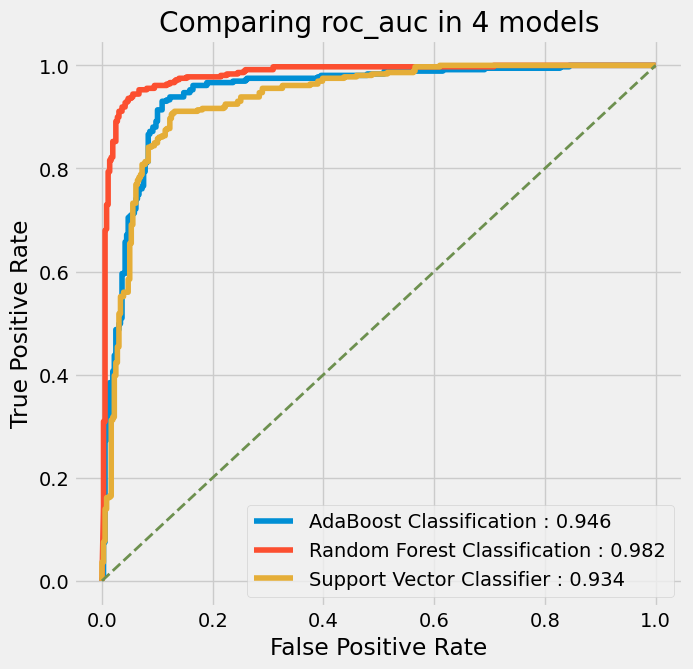

In [52]:
plt.figure(figsize=(7,7))
for score, name in zip(y_scores, model_names):
    roc_score = roc_auc_score(y_train_smote, score[:, 1])
    fpr, tpr, threshold = roc_curve(y_train_smote, score[:, 1])
    plt.plot(fpr, tpr, label=f"{name} : {round(roc_score, 3)}")
plt.legend()
plt.plot([0,1],[0,1], '--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparing roc_auc in 4 models');

In [53]:
rf = RandomForestClassifier(n_estimators=rf_best['n_estimators'], criterion=rf_best['criterion'], max_depth=rf_best['max_depth'],
                                  random_state=123)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10, random_state=123)

Сохраняем лучшую модель.

In [ ]:
# Предполагая, что у вас есть модель с именем model
model.fit(X_train, y_train)

# Сохранение модели
joblib.dump(model, '/content/drive/MyDrive/preddd/model_4.joblib')

# Загрузка модели
loaded_model = joblib.load('/content/drive/MyDrive/preddd/model_4.joblib')